# Deep Learning – Classification (scikit-learn)

This notebook is part of the **ML-Methods** project.

It introduces **Deep Learning for supervised classification**
using the scikit-learn implementation of neural networks.

As with the other classification notebooks,
the first sections focus on data preparation
and are intentionally repeated.

This ensures consistency across models
and allows fair comparison of results.

-----------------------------------------------------

## Notebook Roadmap (standard ML-Methods)

1. Project setup and common pipeline  
2. Dataset loading  
3. Train-test split  
4. Feature scaling (why we do it)  

----------------------------------

5. What is this model? (Intuition)  
6. Model training  
7. Model behavior and key parameters  
8. Predictions  
9. Model evaluation  
10. When to use it and when not to  
11. Model persistence  
12. Mathematical formulation (deep dive)  
13. Final summary – Code only  

-----------------------------------------------------

## How this notebook should be read

This notebook is designed to be read **top to bottom**.

Before every code cell, you will find a short explanation describing:
- what we are about to do
- why this step is necessary
- how it fits into the overall process

The goal is not just to run the code,
but to understand how **deep learning models**
fit into the supervised learning pipeline
and how they differ from classical machine learning methods.

-----------------------------------------------------

## What is Deep Learning (in this context)?

Deep Learning refers to a class of models
based on **neural networks with multiple layers**.

These models are designed to:
- learn complex, non-linear relationships
- automatically build internal representations
- go beyond hand-crafted features

In this notebook, we focus on:
**Deep Learning for tabular data**
using a **Multi-Layer Perceptron (MLP)**.

-----------------------------------------------------

## Why use scikit-learn for Deep Learning?

scikit-learn provides a **high-level abstraction**
for neural networks through `MLPClassifier`.

This allows us to:
- focus on concepts rather than low-level details
- reuse the same pipeline as classical ML models
- understand *what* deep learning does
  before learning *how* it is implemented internally

This notebook acts as a **conceptual bridge**
between classical machine learning
and full deep learning frameworks
such as PyTorch and TensorFlow.

-----------------------------------------------------

## What you should expect from the results

With Deep Learning (scikit-learn), you should expect:

- non-linear decision boundaries
- improved performance on complex patterns
- higher sensitivity to feature scaling
- longer training times compared to linear models

However:
- interpretability is lower
- hyperparameter tuning becomes more important
- the model behaves as a black box

-----------------------------------------------------


## 1. Project setup and common pipeline 

In this section we set up the common pipeline
used across classification models in this project.


In [1]:
# ====================================
# Common imports used across classification models
# ====================================

import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)

from pathlib import Path
import joblib
import matplotlib.pyplot as plt


-----------------------------------------------------
## 2. Dataset loading

In this section we load the dataset
used for the Deep Learning classification task.

We intentionally use the **same dataset**
adopted in previous classification notebooks.

This allows:
- direct comparison with classical ML models
- isolation of the effect of the model choice
- consistent evaluation across methods



In [2]:
# ====================================
# Dataset loading
# ====================================

data = load_breast_cancer(as_frame=True)

X = data.data
y = data.target


### Inputs and target

The dataset is composed of:
- input features \( X \)
- target labels \( y \)

This is a **binary classification problem**,
where each sample belongs to one of two classes.



### Why dataset consistency matters

Using the same dataset across models helps us:
- understand performance differences
- evaluate model complexity vs gains
- avoid misleading conclusions

Any improvement in results
can be attributed to the model itself,
not to changes in the data.

____________________________________________________________________________
## 3. Train-test split

In this section we split the dataset
into training and test sets.

This step is essential to evaluate
how well the Deep Learning model generalizes
to unseen data.


In [3]:
# ====================================
# Train-test split
# ====================================

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


### What we have after this step

After the split:
- the **training set** is used to learn model parameters
- the **test set** is kept completely unseen
- evaluation will reflect real-world performance

An 80 / 20 split is a common default
for medium-sized datasets.

In the next step,
we will apply **feature scaling**.

For Deep Learning models,
this step is **mandatory**,
not optional.


<!-- -----------------------------------------------------
## 2. Dataset loading

In this section we load the dataset
used for the Deep Learning classification task.

We intentionally use the **same dataset**
adopted in previous classification notebooks.

This allows:
- direct comparison with classical ML models
- isolation of the effect of the model choice
- consistent evaluation across methods

-----------------------------------------------------

### Inputs and target

The dataset is composed of:
- input features \( X \)
- target labels \( y \)

This is a **binary classification problem**,
where each sample belongs to one of two classes.

-----------------------------------------------------

### Why dataset consistency matters

Using the same dataset across models helps us:
- understand performance differences
- evaluate model complexity vs gains
- avoid misleading conclusions

Any improvement in results
can be attributed to the model itself,
not to changes in the data.

----------------------------------------------------- -->


__________________________________________________

## 4. Feature scaling (why we do it)

In this section we apply feature scaling
to the input data.

For Deep Learning models,
feature scaling is **not optional**.

Neural networks are trained using
gradient-based optimization methods,
which are highly sensitive to feature scale.


In [4]:
# ====================================
# Feature scaling
# ====================================

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Why scaling is mandatory for Deep Learning

Without proper scaling:
- gradients may explode or vanish
- optimization becomes unstable
- training can be very slow or fail entirely

By scaling the features:
- all inputs contribute on a comparable scale
- gradient descent converges faster
- training becomes more stable and reliable

### Important rule

The scaler is:
- **fitted only on the training data**
- **applied to the test data**

This prevents data leakage
and ensures a fair evaluation.

At this point,
the data is fully prepared
for training a neural network classifier.


___________________________________________________________
## 5. What is this model? (Deep Learning with scikit-learn)

Before training the model,
it is important to clearly understand:

- what we want to achieve
- how we achieve it
- how the model works internally to reach that goal

Deep Learning models can look complex,
but their objective is very precise.


### What do we want to achieve?

We want to build a model that can:
- take an input feature vector \( x \)
- learn complex, non-linear relationships
- output a class prediction \( \hat{y} \)

Unlike linear models,
we do not assume a simple relationship
between inputs and outputs.

Instead, we allow the model
to **learn its own internal representation**
of the data.


### How do we achieve this?

Deep Learning models achieve this by:
- stacking multiple layers of neurons
- applying linear transformations followed by non-linear functions
- progressively transforming the input data

Each layer:
- receives information from the previous layer
- extracts higher-level features
- passes a refined representation forward

This layered structure is what gives
neural networks their expressive power.


### What is a neural network in scikit-learn?

In scikit-learn,
Deep Learning is implemented via
the **Multi-Layer Perceptron (MLP)**.

For classification, we use:

**MLPClassifier**

An MLP is:
- a feed-forward neural network
- composed of fully connected layers
- trained using backpropagation

The model learns:
- weights
- biases

by minimizing a classification loss function.


### How information flows through the model

At a high level, the model performs:

1. A linear transformation of the input  
2. A non-linear activation  
3. Repetition of these steps across multiple layers  
4. A final decision at the output layer  

Through this process,
the network builds increasingly abstract
representations of the data.


### Why non-linearity is essential

If we only stack linear transformations,
the entire model remains linear.

Non-linear activation functions:
- break linearity
- allow the model to approximate complex functions
- enable non-linear decision boundaries

Without non-linearity,
Deep Learning would offer no advantage
over classical linear models.


### How this differs from classical ML models

Compared to Logistic Regression:
- decision boundaries can be highly non-linear
- intermediate representations are learned automatically

Compared to KNN:
- the model learns parameters during training
- prediction does not depend on storing all samples

Compared to Random Forest:
- representations are learned via optimization
- not through rule-based splitting


### Key takeaway (intuitive view)

A Deep Learning model looks complex,
but its core idea is very simple.

Each data sample can be seen as:
- a point in a high-dimensional space
- defined by its feature values

The model represents this point
as a **vector**.

The neural network then learns another set of vectors
(the model parameters)
that try to **align with the data** in a meaningful way.

At a high level:
- the input is a vector
- the model produces another vector
- the closer these representations are,
  the better the prediction

Training means:
- measuring how wrong the prediction is
- adjusting the model parameters
- repeating this process many times

Each neuron answers a very simple question:
> *Is this specific pattern present in the data?*

By stacking many neurons and layers:
- simple questions combine
- complex patterns emerge
- non-linear decision boundaries are formed

The mathematical details of this process
will be introduced later.

For now, the important idea is:
**Deep Learning learns by progressively aligning
model representations with data representations.**


___________________
## 6. Model training (Deep Learning with scikit-learn)

In this section we train a neural network classifier
using scikit-learn.

Unlike classical models such as KNN,
Deep Learning models perform **iterative optimization**.

Training a neural network means:
- initializing model parameters
- repeatedly updating them
- minimizing a classification loss


In [5]:
# Model initialization


mlp_model = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    solver="adam",
    max_iter=500,
    random_state=42
)

# Model training

mlp_model.fit(X_train_scaled, y_train)


,"hidden_layer_sizes hidden_layer_sizes: array-like of shape(n_layers - 2,), default=(100,)The ith element represents the number of neurons in the ithhidden layer.","(64, ...)"
,"activation activation: {'identity', 'logistic', 'tanh', 'relu'}, default='relu'Activation function for the hidden layer.- 'identity', no-op activation, useful to implement linear bottleneck, returns f(x) = x- 'logistic', the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).- 'tanh', the hyperbolic tan function, returns f(x) = tanh(x).- 'relu', the rectified linear unit function, returns f(x) = max(0, x)",'relu'
,"solver solver: {'lbfgs', 'sgd', 'adam'}, default='adam'The solver for weight optimization.- 'lbfgs' is an optimizer in the family of quasi-Newton methods.- 'sgd' refers to stochastic gradient descent.- 'adam' refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy BaFor a comparison between Adam optimizer and SGD, see:ref:`sphx_glr_auto_examples_neural_networks_plot_mlp_training_curves.py`.Note: The default solver 'adam' works pretty well on relativelylarge datasets (with thousands of training samples or more) in terms ofboth training time and validation score.For small datasets, however, 'lbfgs' can converge faster and performbetter.",'adam'
,"alpha alpha: float, default=0.0001Strength of the L2 regularization term. The L2 regularization termis divided by the sample size when added to the loss.For an example usage and visualization of varying regularization, see:ref:`sphx_glr_auto_examples_neural_networks_plot_mlp_alpha.py`.",0.0001
,"batch_size batch_size: int, default='auto'Size of minibatches for stochastic optimizers.If the solver is 'lbfgs', the classifier will not use minibatch.When set to ""auto"", `batch_size=min(200, n_samples)`.",'auto'
,"learning_rate learning_rate: {'constant', 'invscaling', 'adaptive'}, default='constant'Learning rate schedule for weight updates.- 'constant' is a constant learning rate given by 'learning_rate_init'.- 'invscaling' gradually decreases the learning rate at each time step 't' using an inverse scaling exponent of 'power_t'. effective_learning_rate = learning_rate_init / pow(t, power_t)- 'adaptive' keeps the learning rate constant to 'learning_rate_init' as long as training loss keeps decreasing. Each time two consecutive epochs fail to decrease training loss by at least tol, or fail to increase validation score by at least tol if 'early_stopping' is on, the current learning rate is divided by 5.Only used when ``solver='sgd'``.",'constant'
,"learning_rate_init learning_rate_init: float, default=0.001The initial learning rate used. It controls the step-sizein updating the weights. Only used when solver='sgd' or 'adam'.",0.001
,"power_t power_t: float, default=0.5The exponent for inverse scaling learning rate.It is used in updating effective learning rate when the learning_rateis set to 'invscaling'. Only used when solver='sgd'.",0.5
,"max_iter max_iter: int, default=200Maximum number of iterations. The solver iterates until convergence(determined by 'tol') or this number of iterations. For stochasticsolvers ('sgd', 'adam'), note that this determines the number of epochs(how many times each data point will be used), not the number ofgradient steps.",500
,"shuffle shuffle: bool, default=TrueWhether to shuffle samples in each iteration. Only used whensolver='sgd' or 'adam'.",True
,"random_state random_state: int, RandomState instance, default=NoneDetermines random number generation for weights and biasinitialization, train-test split if early stopping is used, and batchsampling when solver='sgd' or 'adam'.Pass an int for reproducible results across multiple function calls.See :term:`Glossary `.",42


### What these parameters mean

- `hidden_layer_sizes=(64, 32)`  
  Defines the architecture of the network.
  The model has two hidden layers:
  - first layer with 64 neurons
  - second layer with 32 neurons

- `activation="relu"`  
  Introduces non-linearity.
  ReLU allows the network
  to learn complex decision boundaries.

- `solver="adam"`  
  A gradient-based optimizer
  commonly used for Deep Learning.
  It adapts the learning rate automatically.

- `max_iter=500`  
  Number of training iterations.
  Neural networks usually require
  more iterations than linear models.

- `random_state=42`  
  Ensures reproducibility.

### What happens during training

During training:
- the model makes predictions
- the error is measured
- gradients are computed internally
- weights are updated to reduce the error

This process is repeated many times
until the model converges.

At the end of this step:
- the neural network has learned a set of weights
- the model is ready to make predictions

In the next section,
we will analyze **how the model behaves**
and which hyperparameters influence its decisions.


__________________________________________
## 7. Model behavior and key parameters

In this section we analyze how the neural network behaves
and which parameters most strongly influence its predictions.

Unlike linear models,
Deep Learning models do not expose simple coefficients.

However, their behavior can still be understood
by analyzing architecture and training choices.


### Network architecture

The architecture defines:
- how many layers the model has
- how many neurons are in each layer

More layers and neurons:
- increase model capacity
- allow learning more complex patterns

However:
- too much capacity can lead to overfitting
- training becomes slower and less stable


### Activation functions

Activation functions introduce non-linearity.

Common effects:
- control how signals propagate
- affect gradient flow
- influence training stability

ReLU is widely used because:
- it is simple
- it helps avoid vanishing gradients
- it works well in practice


### Optimization and convergence

Training behavior is strongly influenced by:
- the optimizer
- the learning dynamics
- the number of iterations

If training is unstable:
- the loss may oscillate
- convergence may not be reached

If training is too slow:
- the model may not fully learn
- performance may remain suboptimal


### Generalization behavior

Neural networks tend to:
- fit training data very well
- risk overfitting if not controlled

Signs of overfitting:
- high training performance
- lower test performance

Regularization and architecture choices
play a key role in controlling this behavior.


### Key takeaway

The behavior of a neural network is driven by:
- its architecture
- its activation functions
- its optimization process

More complexity does not always mean better performance.

Understanding **how architectural choices affect behavior**
is more important than blindly increasing model size.

In the next section,
we will use the trained model
to generate predictions
and analyze its outputs.


________________________
## 8. Predictions

In this section we use the trained neural network
to generate predictions on unseen test data.

As with other classification models,
it is important to distinguish between:
- predicted class labels
- predicted class probabilities


In [9]:
# Predictions

# Predict class labels
y_pred = mlp_model.predict(X_test_scaled)

# Predict class probabilities
y_pred_proba = mlp_model.predict_proba(X_test_scaled)


### Predicted class labels

The `predict` method returns:
- the final class assigned to each sample
- based on the highest predicted probability

Each prediction is the result of:
- multiple layers of transformations
- a final decision at the output layer

### Predicted class probabilities

The `predict_proba` method returns:
- a probability for each class
- representing the model’s confidence

For neural networks:
- probabilities are produced by the output layer
- they reflect how strongly the model favors one class over another

### How to interpret these outputs

- High probability → strong confidence
- Lower probability → uncertainty in the decision

Probabilities are especially useful when:
- comparing predictions
- setting decision thresholds
- analyzing borderline cases

At this point, we have:
- predicted labels
- predicted probabilities

In the next section,
we will evaluate these predictions
using classification metrics.


___________________
## 9. Model evaluation

In this section we evaluate the performance
of the neural network classifier
on unseen test data.

Evaluation helps us understand:
- how accurate the model is
- which types of errors it makes
- whether it generalizes well


In [10]:
# Model evaluation

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.9736842105263158

In [11]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[41,  2],
       [ 1, 70]])

In [12]:
# Classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



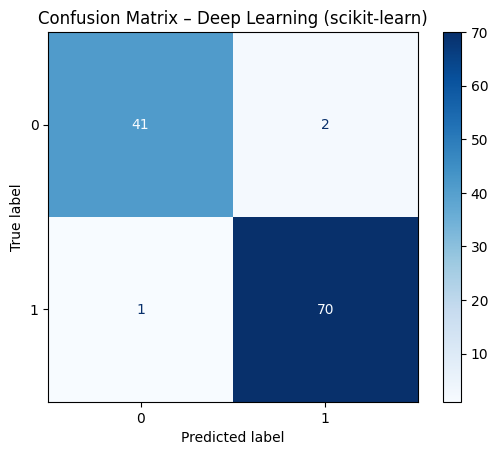

In [13]:
# Confusion matrix visualization

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=mlp_model.classes_
)

disp.plot(cmap="Blues")
plt.title("Confusion Matrix – Deep Learning (scikit-learn)")
plt.show()


### Accuracy

Accuracy measures the proportion
of correctly classified samples.

It provides a quick overview,
but it does not describe
the full error structure.

### Confusion matrix

The confusion matrix shows:
- correct predictions
- false positives
- false negatives

It is the most informative tool
to understand classification behavior.

A model with high accuracy
can still make systematic errors,
which are visible in the confusion matrix.

### Classification report

The classification report summarizes:
- precision
- recall
- F1-score

for each class.

These metrics help evaluate trade-offs
between different types of errors.

### Key takeaway

Neural networks often achieve:
- high accuracy
- strong recall
- robust performance

However, evaluation must always go beyond accuracy.

Understanding **where the model fails**
is more important than a single numeric score.

In the next section,
we will discuss **when to use this model
and when not to**.


____________
## 10. When to use it and when not to

Deep Learning models are powerful,
but they are not always the best choice.

Choosing the right model means
balancing performance, complexity, and interpretability.


### When Deep Learning (scikit-learn) is a good choice

This model works well when:
- the relationship between features and target is non-linear
- classical models struggle to capture complex patterns
- sufficient data is available
- feature engineering is limited or difficult

It is often useful as:
- a strong non-linear baseline
- a bridge between classical ML and full DL frameworks
- a model for complex tabular data


### When Deep Learning (scikit-learn) is NOT a good choice

This model may not be ideal when:
- interpretability is critical
- the dataset is very small
- training time must be minimal
- a simpler model performs equally well

In these cases,
classical models may be preferable.


### Typical warning signs

You should be cautious if:
- training does not converge
- performance fluctuates strongly
- results are unstable across runs
- the model overfits quickly

These signs often indicate
that the model complexity is too high
for the available data.


### Key takeaway

Deep Learning (scikit-learn) provides:
- strong non-linear modeling capability
- a simple, high-level API

However:
- it behaves as a black box
- it requires careful preprocessing
- it is sensitive to hyperparameters

It should be used when its additional complexity
is justified by improved performance.

In the next section,
we will save the trained model
and the preprocessing steps used during training.


___________________________________
## 11. Model persistence

In this section we save the trained Deep Learning model
and the preprocessing steps used during training.

Model persistence allows us to:
- reuse the model without retraining
- ensure reproducibility
- separate training from inference


In [ ]:
# Model persistence

# Define model directory
model_dir = Path("models/supervised_learning/classification/deep_learning_sklearn")

# Create directory if it does not exist
model_dir.mkdir(parents=True, exist_ok=True)

# Save model and scaler
joblib.dump(mlp_model, model_dir / "mlp_classifier.joblib")
joblib.dump(scaler, model_dir / "scaler.joblib")


### Why we save both the model and the scaler

Neural networks are highly sensitive
to feature scaling.

For this reason:
- the scaler is an essential part of the pipeline
- new data must be transformed in the same way

Saving both ensures:
- consistent preprocessing
- reliable predictions
- correct reuse of the model

### How the saved model will be used

In practice, using the model later means:
1. loading the scaler
2. applying it to new input data
3. loading the trained model
4. generating predictions

This guarantees that inference
matches the original training setup.

At this point,
the Deep Learning classification pipeline
is fully trained, evaluated, and saved.

In the next section,
we will look inside the model
from a **mathematical perspective**.


_______________________________
## 12. Mathematical formulation (deep dive)

This section provides a mathematical interpretation
of Deep Learning for classification.

The goal is to connect intuition
with formal concepts,
without focusing on implementation details.


### Representation of the data

Each sample in the dataset is represented as:

$$
x_i \in \mathbb{R}^d
$$

where:
- \( d \) is the number of input features
- each sample is a point in a high-dimensional space

The corresponding target label is:

$$
y_i \in \{0, 1\}
$$

The training set is:

$$
\{(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)\}
$$


### Linear transformation inside a neuron

Each neuron applies a linear transformation:

$$
z = W x + b
$$

where:
- \( W \) is a vector of weights
- \( b \) is a bias term
- \( z \) is the pre-activation value

This operation projects the input vector
onto another direction in space.


### Non-linear activation

A non-linear activation function is applied:

$$
a = \phi(z)
$$

where:
- \( \phi \) is a non-linear function (e.g. ReLU)
- \( a \) is the neuron output

Non-linearity is essential:
without it, the entire network
would reduce to a linear model.


### Layer composition

A neural network is built by stacking layers.

Each layer applies:
- a linear transformation
- followed by a non-linear activation

This creates a sequence of mappings:

$$
x \rightarrow h_1 \rightarrow h_2 \rightarrow \dots \rightarrow \hat{y}
$$

Each layer learns a new representation
of the input data.


### Output layer and prediction

For binary classification,
the output layer produces a value:

$$
\hat{y} = f(x)
$$

which is interpreted as:
- a class score
- or a probability after normalization

The predicted class is:

$$
\text{class} = \arg\max(\hat{y})
$$


### Loss function

Training requires a way to measure error.

This is done using a loss function:

$$
\mathcal{L}(y, \hat{y})
$$

The loss quantifies:
- how far predictions are from true labels
- how well the model fits the data


### Optimization via gradient descent

Model parameters are updated iteratively:

$$
W \leftarrow W - \eta \nabla_W \mathcal{L}
$$

where:
- \( \eta \) is the learning rate
- gradients indicate how parameters should change
- the goal is to minimize the loss


### Learning perspective

From a geometric viewpoint:
- data points are vectors in space
- the model learns transformations
- predictions improve as representations align

Training progressively adjusts the model
to reduce misalignment
between predicted and true outputs.


### Final takeaway

Deep Learning models learn by:
- transforming input vectors
- building intermediate representations
- minimizing a loss through iterative updates

Although implementations may differ,
this mathematical structure
is common to all neural networks.


_____________
## 13. Final summary – Code only

The following cell contains the complete pipeline
from data loading to model persistence.

No explanations are provided here on purpose.


In [ ]:
# ====================================
# Imports
# ====================================

import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)

from pathlib import Path
import joblib
import matplotlib.pyplot as plt


# ====================================
# Dataset loading
# ====================================

data = load_breast_cancer(as_frame=True)

X = data.data
y = data.target


# ====================================
# Train-test split
# ====================================

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


# ====================================
# Feature scaling
# ====================================

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# ====================================
# Model initialization
# ====================================

mlp_model = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    solver="adam",
    max_iter=500,
    random_state=42
)


# ====================================
# Model training
# ====================================

mlp_model.fit(X_train_scaled, y_train)


# ====================================
# Predictions
# ====================================

y_pred = mlp_model.predict(X_test_scaled)
y_pred_proba = mlp_model.predict_proba(X_test_scaled)


# ====================================
# Model evaluation
# ====================================

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

accuracy
cm

print(classification_report(y_test, y_pred))


# ====================================
# Confusion matrix visualization
# ====================================

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=mlp_model.classes_
)

disp.plot(cmap="Blues")
plt.title("Confusion Matrix – Deep Learning (scikit-learn)")
plt.show()


# ====================================
# Model persistence
# ====================================

model_dir = Path("models/supervised_learning/classification/deep_learning_sklearn")
model_dir.mkdir(parents=True, exist_ok=True)

joblib.dump(mlp_model, model_dir / "mlp_classifier.joblib")
joblib.dump(scaler, model_dir / "scaler.joblib")
